# make a sound by simpleaudio

In [1]:
import numpy as np
import simpleaudio as sa

frequency = 440  # Our played note will be 440 Hz
fs = 44100  # 44100 samples per second
seconds = 0.5  # Note duration of 3 seconds

# Generate array with seconds*sample_rate steps, ranging between 0 and seconds
t = np.linspace(0, seconds, seconds * fs, False)

# Generate a 440 Hz sine wave
note = np.sin(frequency * t * 2*np.pi)

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
# Convert to 16-bit data
audio = audio.astype(np.int16)

# Start playback
play_obj = sa.play_buffer(audio, 1, 2, fs)

# Wait for playback to finish before exiting
play_obj.wait_done()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


### simpleaudio
> * channel: left or right (there can be many ways)  
> * bytes_per_sample : 8bit(1) or 16bit(2)

In [2]:
a = sa.WaveObject(audio,1,2,fs).play()

In [3]:
a.stop() # or sa.stop_all()

# make a sound 

* ## fft후 각 주파수에서의 값은 그 주파수의 샘플수/2
> $ sin(2\pi ft)+sin(2\pi 2ft) -> F(f) = len(t)/2 $  
> $ x[n] = \sin(2\pi fn) ->  |X_f| = len(n)/2 $  
> concatenate(sin(2pi*f*t[0:len(t)//2]),sin(2pi*2f*t[len(t)//2,len(t)]) -> F(f) = len(t)//2/2

In [220]:
seconds = 1
f = 50
fs = 44100
t = np.linspace(0,seconds,seconds*fs)
signal1 = np.zeros(shape=(0,),dtype = np.int16)
signal2 = np.zeros(shape=(seconds*fs,),dtype = np.int16)
Number = 10
gap = (seconds*fs//(Number))
for n in range(Number):
    signal1 = np.concatenate(( signal1, np.cos(2*np.pi*f*n*t[gap*n:gap*(n+1)]) ))
    signal2 = signal2 + np.cos(2*np.pi*f*n*t)
# for i
#     signal3 = np.concatenate(( signal2, np.cos(2*np.pi*f*n*t[1/(f*n)]) ))


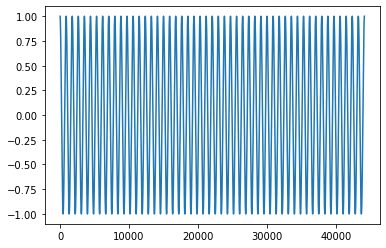

In [222]:
plt.plot(np.cos(2*np.pi*f*t))

In [205]:
signal = signal1

In [206]:
sound = (signal*(2**15-1)).astype(np.int16)

In [207]:
sa.WaveObject(sound,1,2,fs).play()

In [15]:
import matplotlib.pyplot as plt
import scipy
from scipy import fftpack

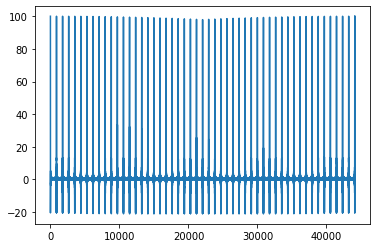

In [208]:
# plt.plot(signal1)
plt.plot(signal2)

In [216]:
np.cos(2*np.pi*f*t[400])

-0.9576669196962421

In [217]:
signal1[400]

1.0

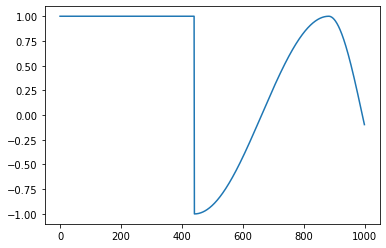

In [211]:
plt.plot(signal1[0:1000])

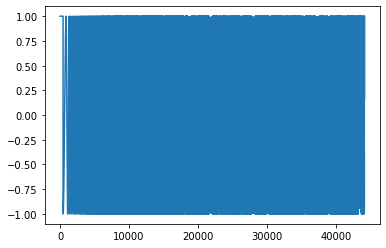

In [210]:
plt.plot(signal1)

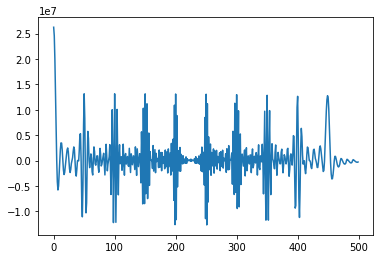

In [85]:
plt.plot(fftpack.fft(sound)[0:500])

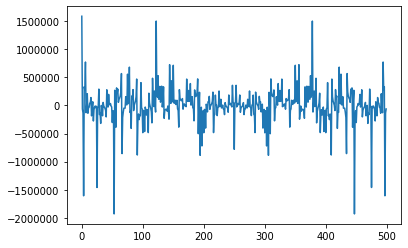

In [104]:
plt.plot(fftpack.fft(sound[0:500]))

In [223]:
a = np.cos(2*np.pi*f*t)

In [225]:
b = np.cos(2*np.pi*2*f*t)

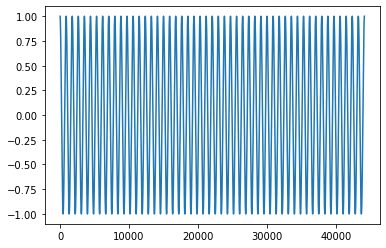

In [224]:
plt.plot(a)

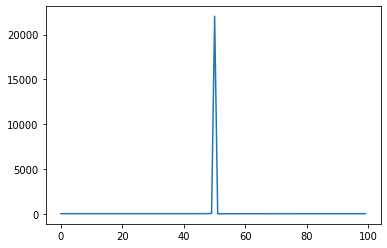

In [231]:
plt.plot(fftpack.fft(a)[0:100])

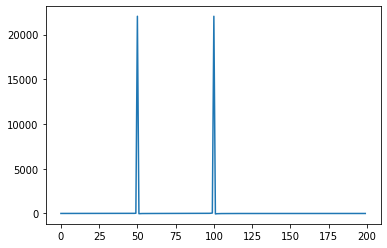

In [234]:
plt.plot(fftpack.fft(a+b)[0:200])
# plt.plot(fftpack.fft(a+b))

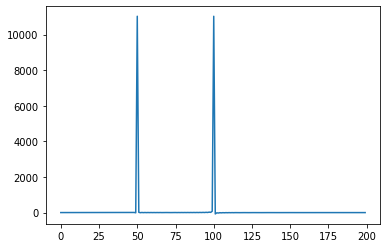

In [236]:
plt.plot(fftpack.fft(np.concatenate((a[0:len(t)//2],b[len(t)//2:len(t)])))[0:200] )

In [240]:
np.bincount(fftpack.fft(np.concatenate(( b[0:len(t)//2],a[len(t)//2:len(t)] )))==fftpack.fft(np.concatenate((a[0:len(t)//2],b[len(t)//2:len(t)]))) )

array([44100], dtype=int64)

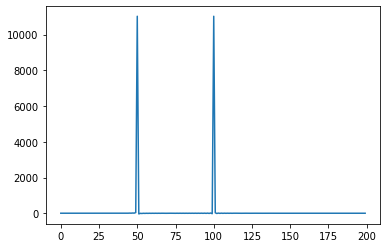

In [244]:
plt.plot(fftpack.fft(np.concatenate((b[0:len(t)//2],a[len(t)//2:len(t)])))[0:200] )

In [243]:
fftpack.fft(np.concatenate((a[0:len(t)//2],b[len(t)//2:len(t)]))).max()

(11025.768335331397+19.638717761832698j)

In [245]:
fftpack.fft(np.concatenate(( b[0:len(t)//2],a[len(t)//2:len(t)] ))).max()

(11025.628467301185+58.9064060146694j)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


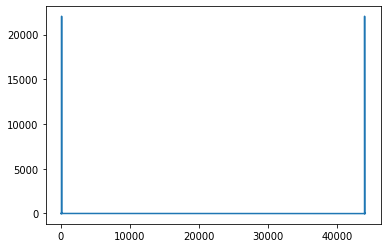

In [228]:
plt.plot(fftpack.fft(b))

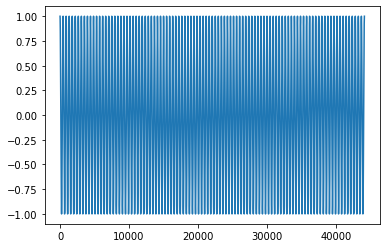

In [226]:
plt.plot(b)